<a href="https://colab.research.google.com/github/almdanddre/phd-data/blob/main/Analises_DOU_UEPB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Função para verificar normalidade e plotar gráficos
def verificar_normalidade(dados, grupo_nome):
    # Teste de Shapiro-Wilk
    shapiro_test = stats.shapiro(dados)
    print(f"Teste de Shapiro-Wilk para {grupo_nome}: W={shapiro_test.statistic}, p-value={shapiro_test.pvalue}")

    # Teste de Kolmogorov-Smirnov
    ks_test = stats.kstest(dados, 'norm', args=(dados.mean(), dados.std()))
    print(f"Teste de Kolmogorov-Smirnov para {grupo_nome}: D={ks_test.statistic}, p-value={ks_test.pvalue}")

    # Histograma
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    sns.histplot(dados, kde=True)
    plt.title(f'Histograma - {grupo_nome}')

    # Gráfico Q-Q
    plt.subplot(1, 2, 2)
    stats.probplot(dados, dist="norm", plot=plt)
    plt.title(f'Q-Q Plot - {grupo_nome}')

    plt.tight_layout()
    plt.show()

# Carregar os dados do arquivo CSV
# Supondo que o arquivo CSV está nomeado como 'dados.csv' e está no mesmo diretório
df = pd.read_csv('/content/sample_data/Dados - C x E - TEMPO, NSUB.csv')

# Exemplo de como o CSV pode ser estruturado
# | Grupo        | Variável1 |
# |--------------|-----------|
# | Controle     | 10.5      |
# | Controle     | 12.3      |
# | Experimental | 13.1      |
# ...




Dados Carregados:
            Grupo Exercício  Tempo  NSub
0        Controle      EX 1     24    10
1        Controle      EX 1     29     5
2        Controle      EX 1     26     3
3        Controle      EX 1     25     6
4        Controle      EX 1     27     2
..            ...       ...    ...   ...
107  Experimental      EX 4     19     6
108  Experimental      EX 4     16     3
109  Experimental      EX 4      8     5
110  Experimental      EX 4     20     5
111  Experimental      EX 4     13     3

[112 rows x 4 columns]


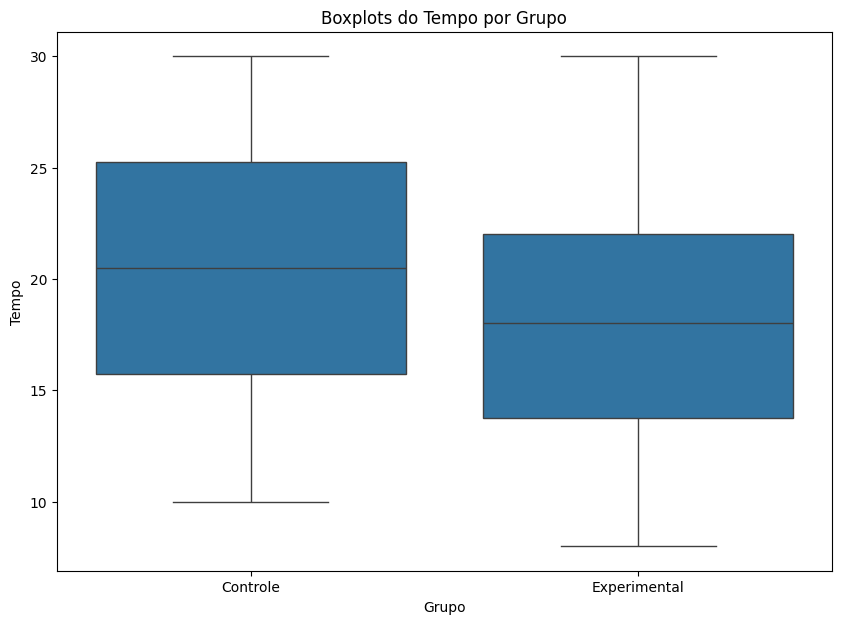

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar os dados do CSV
df = pd.read_csv('/content/sample_data/Dados - C x E - TEMPO, NSUB.csv')
print("Dados Carregados:")
print(df)

# Plotar os boxplots
plt.figure(figsize=(10, 7))
sns.boxplot(x='Grupo', y='Tempo', data=df)

# Configurações do gráfico
plt.title('Boxplots do Tempo por Grupo')
plt.xlabel('Grupo')
plt.ylabel('Tempo')

# Mostrar o gráfico
plt.show()


Dados Carregados:
            Grupo Exercício  Tempo  NSub
0        Controle      EX 1     24    10
1        Controle      EX 1     29     5
2        Controle      EX 1     26     3
3        Controle      EX 1     25     6
4        Controle      EX 1     27     2
..            ...       ...    ...   ...
107  Experimental      EX 4     19     6
108  Experimental      EX 4     16     3
109  Experimental      EX 4      8     5
110  Experimental      EX 4     20     5
111  Experimental      EX 4     13     3

[112 rows x 4 columns]


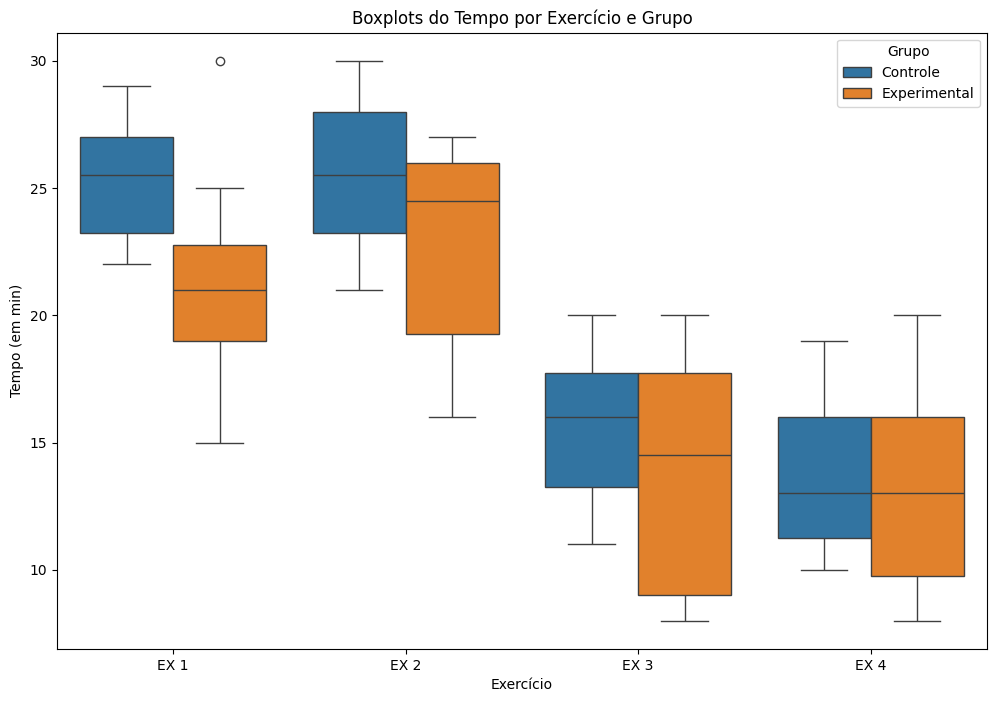

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar os dados do CSV
df = pd.read_csv('/content/sample_data/Dados - C x E - TEMPO, NSUB.csv')
print("Dados Carregados:")
print(df)

# Plotar os boxplots
plt.figure(figsize=(12, 8))
sns.boxplot(x='Exercício', y='Tempo', hue='Grupo', data=df)

# Configurações do gráfico
plt.title('Boxplots do Tempo por Exercício e Grupo')
plt.xlabel('Exercício')
plt.ylabel('Tempo (em min)')
plt.legend(title='Grupo')

# Mostrar o gráfico
plt.show()


**Analisando variável Tempo**

Teste de Shapiro-Wilk para Controle: W=0.9350874423980713, p-value=0.004818002227693796
Teste de Kolmogorov-Smirnov para Controle: D=0.12627440284751157, p-value=0.307341879969364


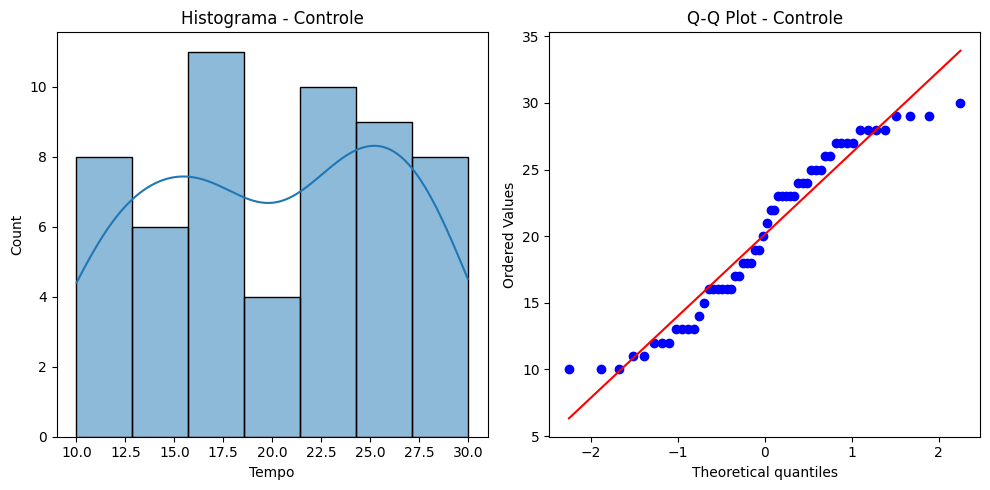

Teste de Shapiro-Wilk para Experimental: W=0.963716447353363, p-value=0.09014634788036346
Teste de Kolmogorov-Smirnov para Experimental: D=0.07808743703574933, p-value=0.8578553173518528


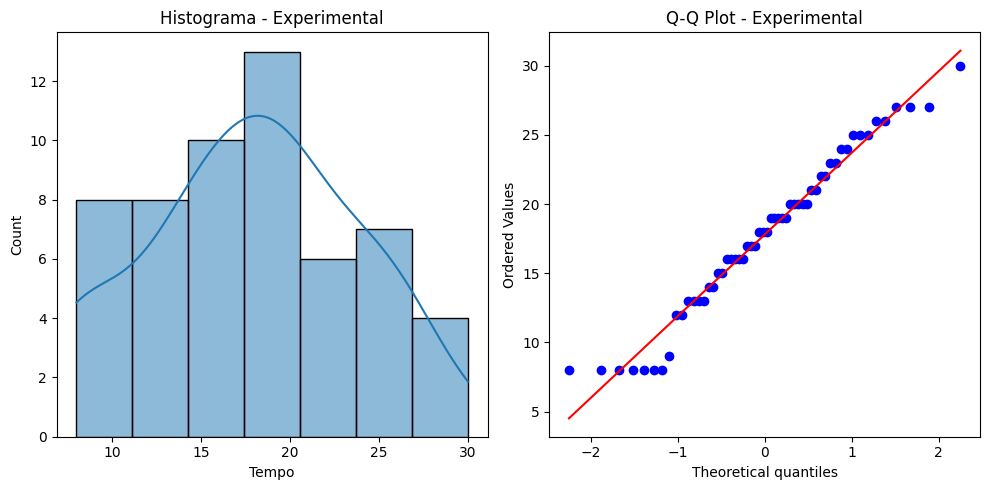

In [8]:
# Separar os grupos
controle = df[df['Grupo'] == 'Controle']['Tempo']
experimental = df[df['Grupo'] == 'Experimental']['Tempo']

# Verificar a normalidade para o grupo de controle
verificar_normalidade(controle, 'Controle')

# Verificar a normalidade para o grupo experimental
verificar_normalidade(experimental, 'Experimental')

In [3]:
# Realizar o Teste de Mann-Whitney U
mann_whitney_test = stats.mannwhitneyu(controle, experimental, alternative='two-sided')
print(f"Teste de Mann-Whitney U: U={mann_whitney_test.statistic}, p-value={mann_whitney_test.pvalue}")

Teste de Mann-Whitney U: U=1885.0, p-value=0.06507909775485309


**Analisando variável NSUB**

Dados Carregados:
            Grupo Exercício  Tempo  NSub
0        Controle      EX 1     24    10
1        Controle      EX 1     29     5
2        Controle      EX 1     26     3
3        Controle      EX 1     25     6
4        Controle      EX 1     27     2
..            ...       ...    ...   ...
107  Experimental      EX 4     19     6
108  Experimental      EX 4     16     3
109  Experimental      EX 4      8     5
110  Experimental      EX 4     20     5
111  Experimental      EX 4     13     3

[112 rows x 4 columns]


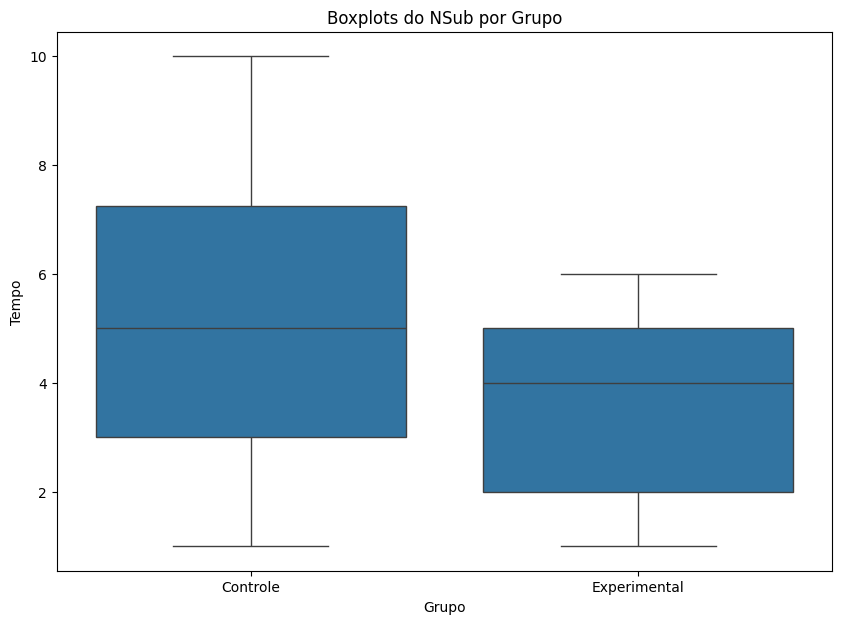

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar os dados do CSV
df = pd.read_csv('/content/sample_data/Dados - C x E - TEMPO, NSUB.csv')
print("Dados Carregados:")
print(df)

# Plotar os boxplots
plt.figure(figsize=(10, 7))
sns.boxplot(x='Grupo', y='NSub', data=df)

# Configurações do gráfico
plt.title('Boxplots do NSub por Grupo')
plt.xlabel('Grupo')
plt.ylabel('Tempo')

# Mostrar o gráfico
plt.show()


Dados Carregados:
            Grupo Exercício  Tempo  NSub
0        Controle      EX 1     24    10
1        Controle      EX 1     29     5
2        Controle      EX 1     26     3
3        Controle      EX 1     25     6
4        Controle      EX 1     27     2
..            ...       ...    ...   ...
107  Experimental      EX 4     19     6
108  Experimental      EX 4     16     3
109  Experimental      EX 4      8     5
110  Experimental      EX 4     20     5
111  Experimental      EX 4     13     3

[112 rows x 4 columns]


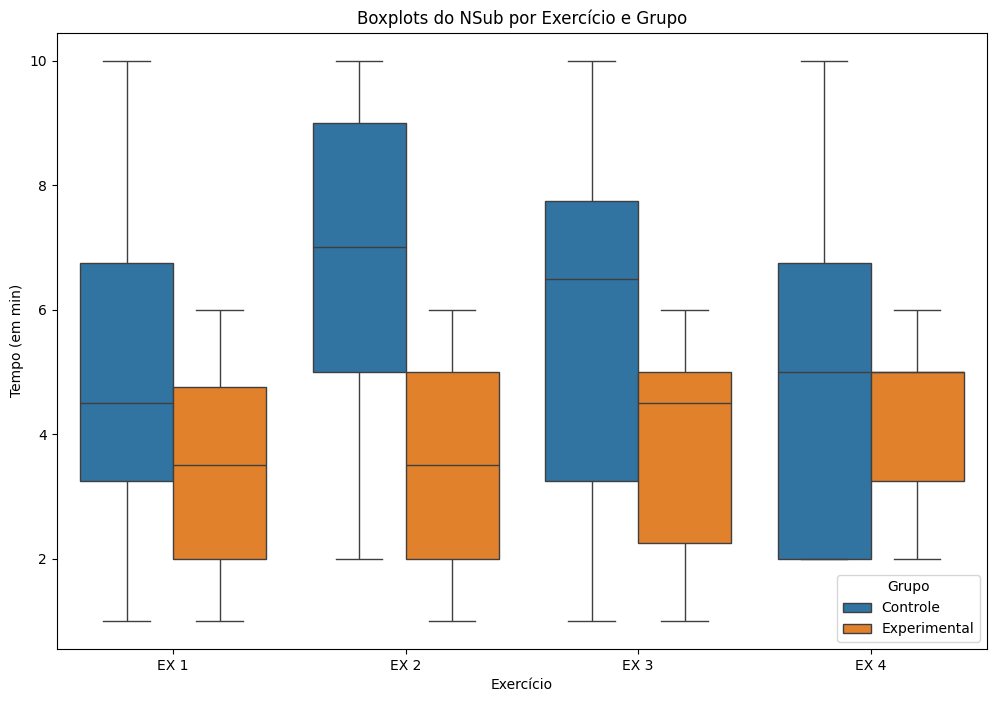

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar os dados do CSV
df = pd.read_csv('/content/sample_data/Dados - C x E - TEMPO, NSUB.csv')
print("Dados Carregados:")
print(df)

# Plotar os boxplots
plt.figure(figsize=(12, 8))
sns.boxplot(x='Exercício', y='NSub', hue='Grupo', data=df)

# Configurações do gráfico
plt.title('Boxplots do NSub por Exercício e Grupo')
plt.xlabel('Exercício')
plt.ylabel('Tempo (em min)')
plt.legend(title='Grupo')

# Mostrar o gráfico
plt.show()


Teste de Shapiro-Wilk para Controle: W=0.9337988495826721, p-value=0.004258899483829737
Teste de Kolmogorov-Smirnov para Controle: D=0.12360895440978131, p-value=0.33151390733470176


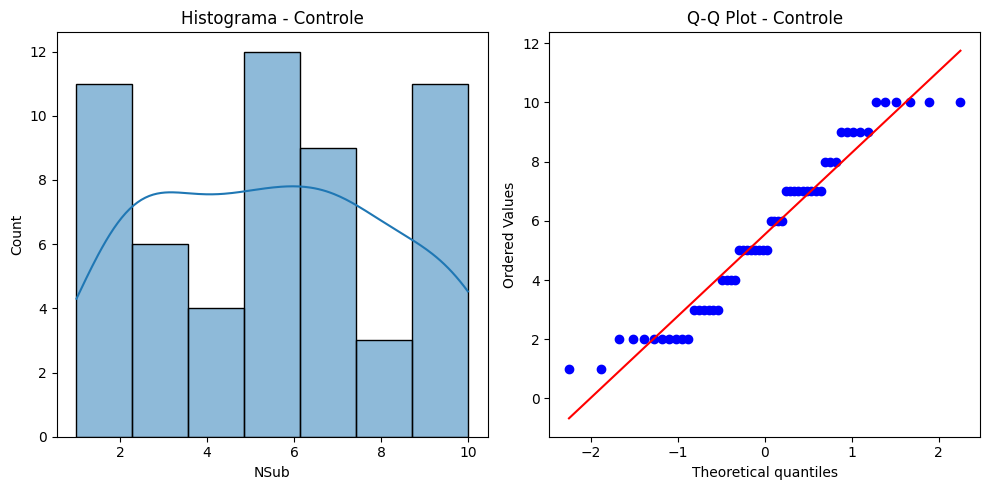

Teste de Shapiro-Wilk para Experimental: W=0.8941559195518494, p-value=0.000137235940201208
Teste de Kolmogorov-Smirnov para Experimental: D=0.2245609181690218, p-value=0.0058080419826251894


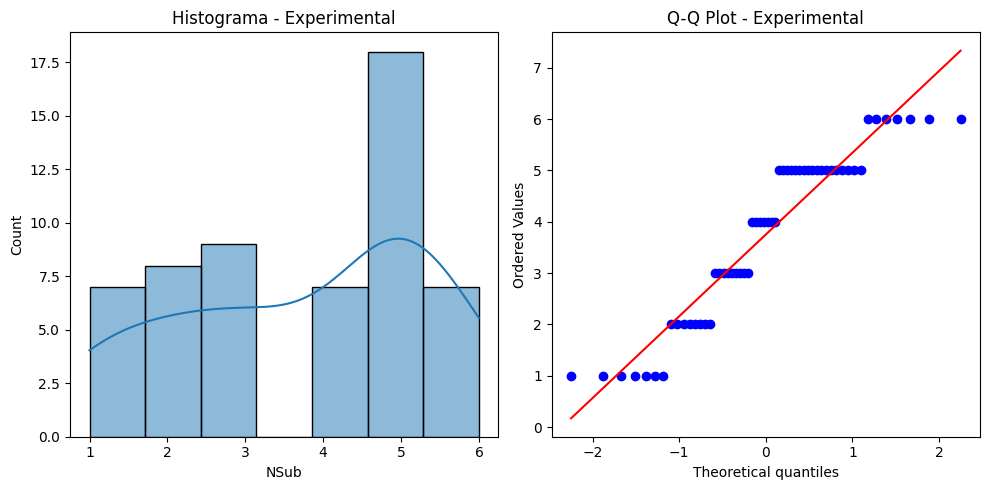

In [5]:
# Separar os grupos
controle2 = df[df['Grupo'] == 'Controle']['NSub']
experimental2 = df[df['Grupo'] == 'Experimental']['NSub']

# Verificar a normalidade para o grupo de controle
verificar_normalidade(controle2, 'Controle')

# Verificar a normalidade para o grupo experimental
verificar_normalidade(experimental2, 'Experimental')

In [6]:
# Realizar o Teste de Mann-Whitney U
mann_whitney_test = stats.mannwhitneyu(controle2, experimental2, alternative='two-sided')
print(f"Teste de Mann-Whitney U: U={mann_whitney_test.statistic}, p-value={mann_whitney_test.pvalue}")

Teste de Mann-Whitney U: U=2151.0, p-value=0.0006108116581418183


**CORRELAÇÃO**

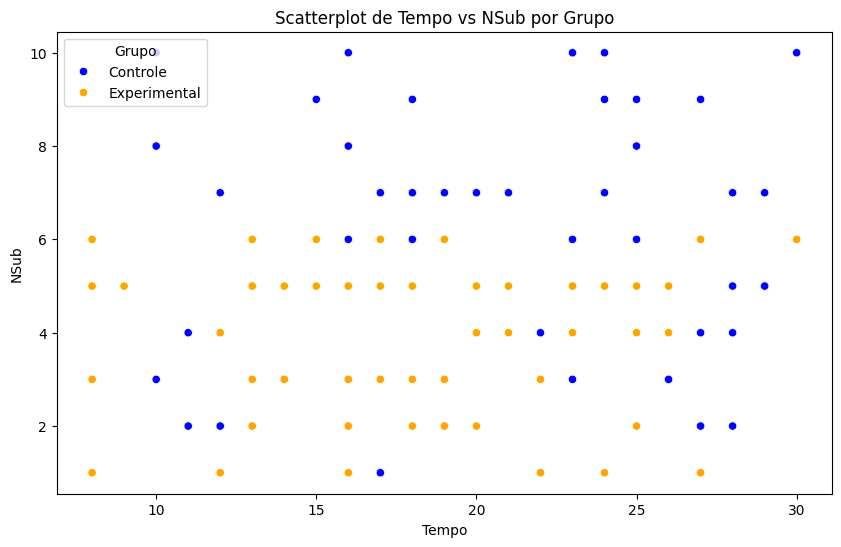

In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Exemplo de DataFrame com os dados
df = pd.read_csv('/content/sample_data/Dados - C x E - TEMPO, NSUB.csv')


# Plotar scatterplot com paleta de cores diferenciada por grupo
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Tempo', y='NSub', hue='Grupo', palette=['blue', 'orange'])
plt.title('Scatterplot de Tempo vs NSub por Grupo')
plt.xlabel('Tempo')
plt.ylabel('NSub')
plt.legend(title='Grupo')

# Mostrar o gráfico
plt.show()


**Analisando a correlação para o grupo de controle**

In [17]:
import pandas as pd
from scipy import stats

# Carregar os dados do arquivo CSV
df = pd.read_csv('/content/sample_data/Dados - C x E - TEMPO, NSUB.csv')

# Filtrar os dados do grupo de controle
controle = df[df['Grupo'] == 'Controle']

# Verificar a normalidade das variáveis no grupo de controle
shapiro_var1 = stats.shapiro(controle['Tempo'])
shapiro_var2 = stats.shapiro(controle['NSub'])
print(f"Shapiro-Wilk Teste para Controle - Variável1: W={shapiro_var1.statistic}, p-value={shapiro_var1.pvalue}")
print(f"Shapiro-Wilk Teste para Controle - Variável2: W={shapiro_var2.statistic}, p-value={shapiro_var2.pvalue}")

# Escolher o tipo de correlação com base na normalidade
if shapiro_var1.pvalue > 0.05 and shapiro_var2.pvalue > 0.05:
    correlacao, p_valor = stats.pearsonr(controle['Tempo'], controle['NSub'])
    tipo_correlacao = 'Pearson'
else:
    correlacao, p_valor = stats.spearmanr(controle['Tempo'], controle['NSub'])
    tipo_correlacao = 'Spearman'

print(f"Correlação de {tipo_correlacao} para Controle: Correlação={correlacao}, p-value={p_valor}")


Shapiro-Wilk Teste para Controle - Variável1: W=0.9350874423980713, p-value=0.004818002227693796
Shapiro-Wilk Teste para Controle - Variável2: W=0.9337988495826721, p-value=0.004258899483829737
Correlação de Spearman para Controle: Correlação=0.10616552048417809, p-value=0.43612355786335866


In [18]:
if p_valor < 0.05:
      significancia = "significativa"
else:
      significancia = "não significativa"

if correlacao > 0:
    direcao = "positiva"
elif correlacao < 0:
    direcao = "negativa"
else:
    direcao = "nula"

if abs(correlacao) < 0.1:
    forca = "negligenciável"
elif abs(correlacao) < 0.3:
    forca = "fraca"
elif abs(correlacao) < 0.5:
    forca = "moderada"
elif abs(correlacao) < 0.7:
    forca = "forte"
else:
    forca = "muito forte"

print(f"Interpretação: A correlação é {significancia}, {direcao} e de força {forca}.")


Interpretação: A correlação é não significativa, positiva e de força fraca.


**Analisando a correlação para o grupo experimental**

In [19]:
import pandas as pd
from scipy import stats

# Carregar os dados do arquivo CSV
df = pd.read_csv('/content/sample_data/Dados - C x E - TEMPO, NSUB.csv')

# Filtrar os dados do grupo de controle
experimental = df[df['Grupo'] == 'Experimental']

# Verificar a normalidade das variáveis no grupo de controle
shapiro_var1 = stats.shapiro(experimental['Tempo'])
shapiro_var2 = stats.shapiro(experimental['NSub'])
print(f"Shapiro-Wilk Teste para Experimental - Variável1: W={shapiro_var1.statistic}, p-value={shapiro_var1.pvalue}")
print(f"Shapiro-Wilk Teste para Experimental - Variável2: W={shapiro_var2.statistic}, p-value={shapiro_var2.pvalue}")

# Escolher o tipo de correlação com base na normalidade
if shapiro_var1.pvalue > 0.05 and shapiro_var2.pvalue > 0.05:
    correlacao, p_valor = stats.pearsonr(experimental['Tempo'], experimental['NSub'])
    tipo_correlacao = 'Pearson'
else:
    correlacao, p_valor = stats.spearmanr(experimental['Tempo'], experimental['NSub'])
    tipo_correlacao = 'Spearman'

print(f"Correlação de {tipo_correlacao} para Experimental: Correlação={correlacao}, p-value={p_valor}")


Shapiro-Wilk Teste para Experimental - Variável1: W=0.963716447353363, p-value=0.09014634788036346
Shapiro-Wilk Teste para Experimental - Variável2: W=0.8941559195518494, p-value=0.000137235940201208
Correlação de Spearman para Experimental: Correlação=-0.08744827487890852, p-value=0.5216053109718406


In [20]:
if p_valor < 0.05:
      significancia = "significativa"
else:
      significancia = "não significativa"

if correlacao > 0:
    direcao = "positiva"
elif correlacao < 0:
    direcao = "negativa"
else:
    direcao = "nula"

if abs(correlacao) < 0.1:
    forca = "negligenciável"
elif abs(correlacao) < 0.3:
    forca = "fraca"
elif abs(correlacao) < 0.5:
    forca = "moderada"
elif abs(correlacao) < 0.7:
    forca = "forte"
else:
    forca = "muito forte"

print(f"Interpretação: A correlação é {significancia}, {direcao} e de força {forca}.")

Interpretação: A correlação é não significativa, negativa e de força negligenciável.


**Analisando a significância da taxa total de acertos**

Dados Carregados:
          Grupo  Acertos  Frequência
0      Controle        1           5
1      Controle        2           6
2      Controle        3           1
3      Controle        4           2
4  Experimental        1           2
5  Experimental        2           1
6  Experimental        3           5
7  Experimental        4           6

Tabela de Contingência:
Acertos       1  2  3  4
Grupo                   
Controle      5  6  1  2
Experimental  2  1  5  6


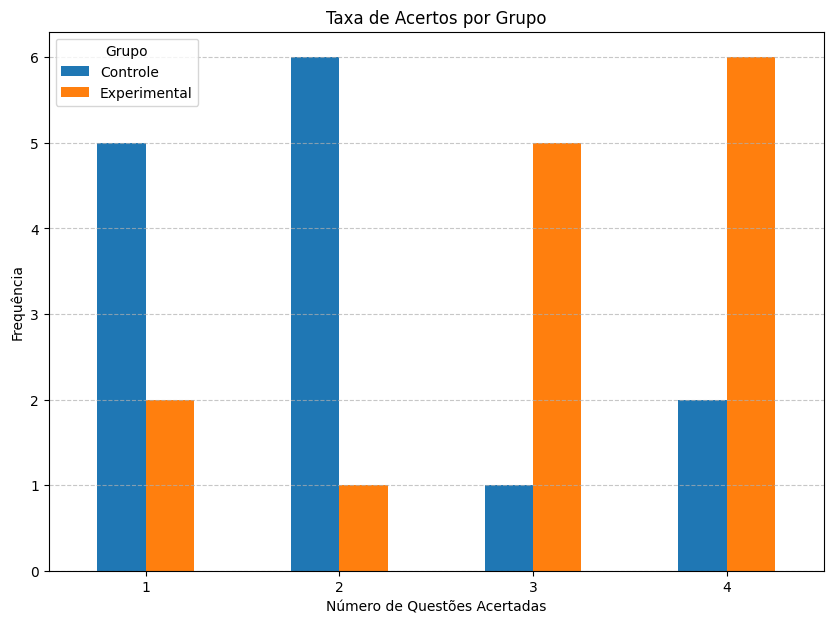

In [56]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar os dados do CSV
df = pd.read_csv('/content/sample_data/Dados - Geral - Total de Acertos(6).csv')
print("Dados Carregados:")
print(df)

# Criar a tabela de contingência
tabela_contingencia = pd.pivot_table(df, values='Frequência', index='Grupo', columns='Acertos', aggfunc='sum', fill_value=0)
print("\nTabela de Contingência:")
print(tabela_contingencia)

# Plotar o gráfico de barras
ax = tabela_contingencia.T.plot(kind='bar', figsize=(10, 7), rot=0)

# Configurações do gráfico
plt.title('Taxa de Acertos por Grupo')
plt.xlabel('Número de Questões Acertadas')
plt.ylabel('Frequência')
plt.xticks(rotation=0)
plt.legend(title='Grupo')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar o gráfico
plt.show()


In [57]:
import pandas as pd
from scipy.stats import chi2_contingency, fisher_exact

# Carregar os dados do CSV
df = pd.read_csv('/content/sample_data/Dados - Geral - Total de Acertos(6).csv')
print("Dados Carregados:")
print(df)

# Criar a tabela de contingência
tabela_contingencia = pd.pivot_table(df, values='Frequência', index='Grupo', columns='Acertos', aggfunc='sum', fill_value=0)
print("\nTabela de Contingência:")
print(tabela_contingencia)

# Converter a tabela de contingência para um array para o teste
contingencia = tabela_contingencia.values


Dados Carregados:
          Grupo  Acertos  Frequência
0      Controle        1           5
1      Controle        2           6
2      Controle        3           1
3      Controle        4           2
4  Experimental        1           2
5  Experimental        2           1
6  Experimental        3           5
7  Experimental        4           6

Tabela de Contingência:
Acertos       1  2  3  4
Grupo                   
Controle      5  6  1  2
Experimental  2  1  5  6


In [58]:
# Realizar o Teste Qui-Quadrado de Independência
chi2, p, dof, expected = chi2_contingency(contingencia)

print("\nTeste Qui-Quadrado de Independência:")
print(f"Estatística Qui-Quadrado: {chi2}")
print(f"Valor p: {p}")
print(f"Graus de Liberdade: {dof}")
print("Frequências Esperadas:\n", expected)

# Interpretar os resultados
if p < 0.05:
    print("Conclusão: Há uma diferença significativa nas taxas de acerto entre os grupos.")
else:
    print("Conclusão: Não há uma diferença significativa nas taxas de acerto entre os grupos.")



Teste Qui-Quadrado de Independência:
Estatística Qui-Quadrado: 9.523809523809524
Valor p: 0.02307941142802383
Graus de Liberdade: 3
Frequências Esperadas:
 [[3.5 3.5 3.  4. ]
 [3.5 3.5 3.  4. ]]
Conclusão: Há uma diferença significativa nas taxas de acerto entre os grupos.


Tendência da taxa de acerto

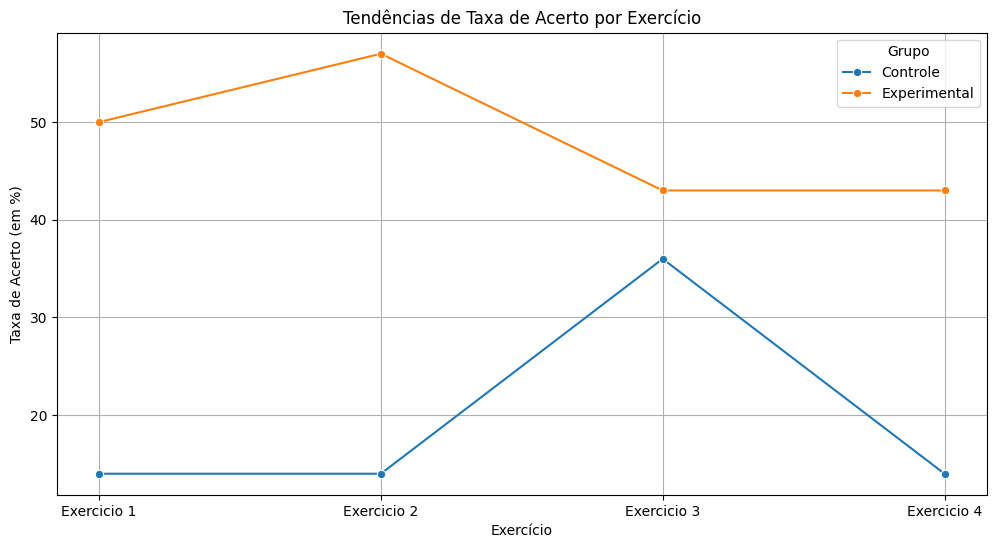

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar os dados do CSV
df = pd.read_csv('/content/sample_data/Dados - Página11(1).csv')

# Calcular as médias de acerto por exercício para cada grupo
media_por_exercicio = df.groupby('Grupo').mean().reset_index()

# Preparar os dados para plotagem
media_por_exercicio = media_por_exercicio.melt(id_vars=['Grupo'], var_name='Exercicio', value_name='Taxa de Acerto')

# Plotar as tendências de acerto por exercício para cada grupo
plt.figure(figsize=(12, 6))
sns.lineplot(data=media_por_exercicio, x='Exercicio', y='Taxa de Acerto', hue='Grupo', marker='o')
plt.title('Tendências de Taxa de Acerto por Exercício')
plt.xlabel('Exercício')
plt.ylabel('Taxa de Acerto (em %)')
plt.xticks(range(4), ['Exercicio 1', 'Exercicio 2', 'Exercicio 3', 'Exercicio 4'])  # Ajustar rótulos do eixo x se necessário
plt.grid(True)
plt.legend(title='Grupo')

# Mostrar o gráfico
plt.show()
